In [22]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [23]:
path = Path("./sampledataset.csv")
data = np.loadtxt(path,delimiter=",",dtype=str)
header_row = data[0]
x_data = np.array(data[1:,0],dtype=float)
y_data = np.array(data[1:,1],dtype=float)


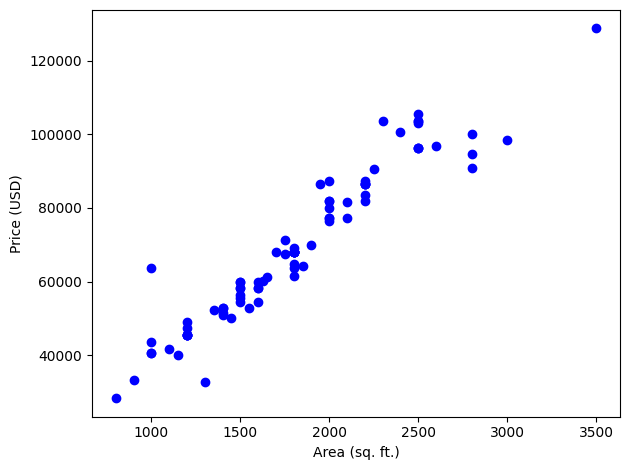

In [24]:
fig, ax = plt.subplots()

ax.scatter(x_data, y_data, c='blue')
ax.set_xlabel("Area (sq. ft.)")
ax.set_ylabel("Price (USD)")

# Adjust layout to prevent truncation
fig.tight_layout()

plt.show()

In [25]:
x_train,x_,y_train,y_ = train_test_split(x_data,y_data,test_size=0.4,random_state=1)
x_cv,x_test,y_cv,y_test = train_test_split(x_,y_,test_size=0.5,random_state=1)

del x_,y_

In [32]:

scaler_linear = StandardScaler()
x_train_linear_normalized = scaler_linear.fit_transform(x_train.reshape(-1,1))

model = LinearRegression()
model.fit(x_train_linear_normalized, y_train)

y_train_predictions = model.predict(x_train_linear_normalized)
training_score = model.score(x_train_linear_normalized, y_train)

x_cv_linear_normalized = scaler_linear.transform(x_cv.reshape(-1,1))
y_cv_predictions = model.predict(x_cv_linear_normalized)
cv_score = model.score(x_cv_linear_normalized, y_cv)

print(f"Training score: {training_score}")
print(f"Cross-validation score: {cv_score}")
print(f"Training RMSE: {root_mean_squared_error(y_train, y_train_predictions)}")
print(f"Cross-validation RMSE: {root_mean_squared_error(y_cv,y_cv_predictions)}")
# The result of the prediction in cross-validation provide a good fit to the data and the RMSE is low.


Training score: 0.9224268776970475
Cross-validation score: 0.9479020125587047
Training RMSE: 5168.93734828042
Cross-validation RMSE: 4850.453174146582


In [33]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train.reshape(-1,1))
scaler_poly = StandardScaler()
x_train_poly_normalized = scaler_poly.fit_transform(x_train_poly)

model2 = LinearRegression()
model2.fit(x_train_poly_normalized, y_train)

y_train_poly_predictions = model2.predict(x_train_poly_normalized)
training_score_poly = model2.score(x_train_poly_normalized, y_train)

x_cv_poly = poly.transform(x_cv.reshape(-1,1))
x_cv_poly_normalized = scaler_poly.transform(x_cv_poly)
y_cv_poly_predictions = model2.predict(x_cv_poly_normalized)
cv_score_poly = model2.score(x_cv_poly_normalized, y_cv)

print(f"Training score (polynomial): {training_score_poly}")
print(f"Cross-validation score (polynomial): {cv_score_poly}")
print(f"Training RMSE (polynomial): {root_mean_squared_error(y_train, y_train_poly_predictions)}")
print(f"Cross-validation RMSE (polynomial): {root_mean_squared_error(y_cv,y_cv_poly_predictions)}")
# By adding a polynomial feature, the model is able to fit the data better and the RMSE is lower than the linear model.




Training score (polynomial): 0.9242736454883972
Cross-validation score (polynomial): 0.9516793879902469
Training RMSE (polynomial): 5107.038799304172
Cross-validation RMSE (polynomial): 4671.303190738452


In [34]:
poly2 = PolynomialFeatures(degree=3)
x_train_poly2 = poly2.fit_transform(x_train.reshape(-1,1))
scaler_poly2 = StandardScaler()
x_train_poly2_normalized = scaler_poly2.fit_transform(x_train_poly2)

model3 = LinearRegression()
model3.fit(x_train_poly2_normalized, y_train)

y_train_poly2_predictions = model3.predict(x_train_poly2_normalized)
training_score_poly2 = model3.score(x_train_poly2_normalized, y_train)

x_cv_poly2 = poly2.transform(x_cv.reshape(-1,1))
x_cv_poly2_normalized = scaler_poly2.transform(x_cv_poly2)
y_cv_poly2_predictions = model3.predict(x_cv_poly2_normalized)
cv_score_poly2 = model3.score(x_cv_poly2_normalized, y_cv)

print(f"Training score (polynomial 2): {training_score_poly2}")
print(f"Cross-validation score (polynomial 2): {cv_score_poly2}")
print(f"Training RMSE (polynomial 2): {root_mean_squared_error(y_train, y_train_poly2_predictions)}")
print(f"Cross-validation RMSE (polynomial 2): {root_mean_squared_error(y_cv,y_cv_poly2_predictions)}")
# By adding a polynomial feature of degree 3, the model is able to fit the data better and the RMSE is lower than the polynomial model of degree 2. 


Training score (polynomial 2): 0.945589999613536
Cross-validation score (polynomial 2): 0.9605001233791555
Training RMSE (polynomial 2): 4328.9741916923085
Cross-validation RMSE (polynomial 2): 4223.472906052628


In [36]:
# Since model 3 found to be the best model, we will use it to predict the test data.

x_test_poly2 = poly2.transform(x_test.reshape(-1,1))
x_test_poly2_normalized = scaler_poly2.transform(x_test_poly2)
y_test_poly2_predictions = model3.predict(x_test_poly2_normalized)
test_score_poly2 = model3.score(x_test_poly2_normalized, y_test)

print(f"Test score (polynomial 2): {test_score_poly2}")
print(f"Test RMSE (polynomial 2): {root_mean_squared_error(y_test, y_test_poly2_predictions)}")
# The test score and RMSE are not good, which means that the model is not able to generalize well to unseen data. or the degree of three poly may be overfitting the data.

Test score (polynomial 2): 0.26230443923862645
Test RMSE (polynomial 2): 21303.122221956648


In [37]:
# This time I will try to check model 2 with the test data.

x_test_poly = poly.transform(x_test.reshape(-1,1))
x_test_poly_normalized = scaler_poly.transform(x_test_poly)
y_test_poly_predictions = model2.predict(x_test_poly_normalized)
test_score_poly = model2.score(x_test_poly_normalized, y_test)

print(f"Test score (polynomial): {test_score_poly}")
print(f"Test RMSE (polynomial): {root_mean_squared_error(y_test, y_test_poly_predictions)}")
# Suprisingly this time the model 2 is able to generalize well to unseen data. The RMSE is low and the test score is good.
# That being said, the model 2 is the best model to predict the price of the house based on the area.
# The model 2 is the best model to predict the price of the house based on the area. The model 2 has the lowest RMSE and the highest test score.

# I learn a lot from evaluating models, although we found model 3 to have the best score in the cross-validation,
# it is not always the best model to predict the test data. In this case, it really is better to have 3 sets of data (training, cross-validation, and test) to evaluate the model.

Test score (polynomial): 0.8450298755932255
Test RMSE (polynomial): 9764.020102372884
